# Regular Expressions

# TODO: String format, float formats
https://pyformat.info/

In [3]:
'{} {}'.format('one', 'two')

'one two'

In [34]:
print(("hi %100.3f %2.2d") % (122.30, 4))

hi                                                                                              122.300 04


In [12]:
## Matching and Extracting Data

import re
x = 'My 2 favorite numbers are 19 and 42'
y = re.findall('[0-9]+',x)
print(y)


['2', '19', '42']


'sandeep'

In [90]:

import re

# . means any single char
re.findall("t...", "this is a aa and that is a aaa")
re.findall("a. ", "this is a aa and that is a aaa")

# * - 0 or more number of prev character
re.findall("aa*", "this is a aa and that is a aaa")
re.findall(".*", "this is a aa and that is a aaa")
# aa* -> a, aa, aaa, ...

# + means 1 or more of preceding
#re.findall("a+", "this is a aa and that is a aaa")
re.findall("aa+", "this is a aa and that is a aaa")

re.findall("thi?", "this is a            aa and that is a aaa")

# escape
re.findall(".\\+", "this+ is a aa and that is a aaa")

#Beging of line
re.findall("^t....", "this is a aa and that is a aaa")

#End of line
re.findall("......a$", "this is a aa and that is a aaa")

#Space
re.findall("a\s", "this is a            aa and that is a aaa")
re.findall("a +", "this is a            aa and that is a aaa")
re.findall("a\S", "this is a            aa and that is a aaa")

re.findall("th[ai][st]", "this is a            aa and that is a aaa")
re.findall("[aeiou]", "this is a            aa and that is a aaa")
re.findall("[aeiou][^aeiou]", "this is a            aa and that is a aaa")
re.findall("[a-s]", "this is a            aa and that is a aaa")
re.findall("[A-Z]", "this is a            Aaa and that is a aaa")
re.findall('[0-9]+', 'My 2 favorite numbers are 19 and 42')

re.findall('[0-9]+\\.[0-9]+', 'My 2.x favorite numbers are 1912121.00995 and 42')
re.findall('[^0-9a-zA-Z.]', 'My 2.x favorite, numbers: are 1912121.00995 and 42')


[' ', ' ', ',', ' ', ':', ' ', ' ', ' ', ' ']

In [ ]:
## Using re.search() like find()

import re

hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('From:', line) :
        print(line)


In [7]:
## Using re.search() like startswith()

import re

hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('^From:', line) :
        print(line)


In [72]:
## Matching and Extracting Data

import re
x = 'My 2 favorite numbers are 19 and 42'
y = re.findall('[0-9]+',x)
print(y)


['2', '19', '42']


In [ ]:
## Matching and Extracting Data

import re
x = 'My 2 favorite numbers are 19 and 42'
y = re.findall('[0-9]+',x)
print(y)
y = re.findall('[AEIOU]+',x)
print(y)

In [94]:
## Warning: Greedy Matching

import re
x = 'From: Using the : character'
#y = re.findall('^F.+:', x)
y = re.findall('^F[^ ]+:', x)
print(y)


['From:']


In [93]:
## Non-Greedy Matching
import re
x = 'From: Using the : character'
y = re.findall('^F.+?:', x)
print(y)

['From:']


In [107]:
## Fine-Tuning String Extraction
x = 'From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008'
re.findall('\S+@\S+',x)


['stephen.marquard@uct.ac.za']

In [ ]:
## Fine-Tuning String Extraction

y = re.findall('\S+@\S+',x)
print(y)
y = re.findall('^From:.*? (\S+@\S+)',x)
print(y)


In [ ]:
data = 'From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008'
atpos = data.find('@')
print(atpos)
sppos = data.find(' ',atpos)
print(sppos)
host = data[atpos+1 : sppos]
print(host)


In [ ]:
## The Double Split Pattern
line = 'From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008'
words = line.split()
email = words[1]
pieces = email.split('@')
print(pieces[1])


In [ ]:
## The Regex Version

import re 
lin = 'From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008'
y = re.findall('@([^ ]*)',lin)
print(y)
['uct.ac.za']


In [ ]:
## Even Cooler Regex Version
import re 
lin = 'From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008'
y = re.findall('^From .*@([^ ]*)',lin)
print(y)
['uct.ac.za']


In [ ]:
## Spam Confidence

import re
hand = open('mbox-short.txt')
numlist = list()
for line in hand:
    line = line.rstrip()
    stuff = re.findall('^X-DSPAM-Confidence: ([0-9.]+)', line)
    if len(stuff) != 1 :  continue
    num = float(stuff[0])
    numlist.append(num)
print('Maximum:', max(numlist))


In [ ]:
## Escape Character

import re
x = 'We just received $10.00 for cookies.'
y = re.findall('\$[0-9.]+',x)
print(y)


## An HTTP Request in Python


In [ ]:

import socket
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('www.py4inf.com', 80))

mysock.send('GET http://www.py4inf.com/code/romeo.txt HTTP/1.0\n\n')

while True:
    data = mysock.recv(512)
    if ( len(data) < 1 ) :
        break
    print(data)
mysock.close()

In [ ]:
## Using urllib in Python

from urllib import *

fhand = request.urlopen('http://www.py4inf.com/code/romeo.txt')

for line in fhand:
    print(line.strip())


In [ ]:
# And like a file
from urllib import *
fhand = request.urlopen('http://www.py4inf.com/code/romeo.txt')

counts = dict()
for line in fhand:
    words = line.split()
    for word in words:
        counts[word] = counts.get(word,0) + 1
print(counts)


In [ ]:
## Reading Web Pages

from urllib import *
fhand = request.urlopen('http://www.dr-chuck.com/page1.htm')
for line in fhand:
    print(line.strip())


## The Easy Way - Beautiful Soup

In [ ]:
!pip install beautifulsoup4 # Already installed on CloudxLab

In [ ]:
# Enter http://en.wikipedia.org/wiki/Web_scraping
from urllib import *
from bs4 import BeautifulSoup

url = input('Enter - ')

html = request.urlopen(url).read()
soup = BeautifulSoup(html)

# Retrieve a list of the anchor tags
# Each tag is like a dictionary of HTML attributes

tags = soup('a')

for tag in tags:
   print(tag.get('href', None))

# Objects

In [ ]:
movies = list()
movie1 = dict()
movie1['Director'] = 'James Cameron'
movie1['Title'] = 'Avatar'
movie1['Release Date'] = '18 December 2009'
movie1['Running Time'] = '162 minutes'
movie1['Rating'] = 'PG-13'
movies.append(movie1)
movie2 = dict()
movie2['Director'] = 'David Fincher'
movie2['Title'] = 'The Social Network'
movie2['Release Date'] = '01 October 2010'
movie2['Running Time'] = '120 min'
movie2['Rating'] = 'PG-13'
movies.append(movie2)
keys = ['Title', 'Director', 'Rating', 'Running Time']

print('-----------')
print(movies)
print('-----------')
print(keys)

for item in movies:
    print('-----------')
    for key in keys:
        print(key,': ', item[key])
print('-----------')


In [ ]:
movies

In [ ]:
class PartyAnimal:
    x = 0

    def party(self) :
      self.x = self.x + 1
      print("So far",self.x)

an = PartyAnimal()

an.party()
an.party()
an.party()


In [ ]:
class PartyAnimal:
   x = 0

   def party(self) :
     self.x = self.x + 1
     print("So far", self.x)

an = PartyAnimal()

print("Type", type(an))
print("Dir ", dir(an))


In [ ]:
## Constructor

class PartyAnimal:
   x = 0

   def __init__(self):
     print("I am constructed")

   def party(self) :
     self.x = self.x + 1
     print("So far", self.x)

   def __del__(self):
     print("I am destructed", self.x)

an = PartyAnimal()
an.party()
an.party()
an.party()


In [ ]:
## Many Instances

class PartyAnimal:
   x = 0
   name = ""
   def __init__(self, nam):
     self.name = nam
     print(self.name,"constructed")

   def party(self) :
     self.x = self.x + 1
     print(self.name,"party count",self.x)

s = PartyAnimal("Sally")
s.party()

j = PartyAnimal("Jim")
j.party()
s.party()


In [ ]:
## Inheritance

class PartyAnimal:
   x = 0
   name = ""
   def __init__(self, nam):
     self.name = nam
     print(self.name,"constructed")

   def party(self) :
     self.x = self.x + 1
     print(self.name,"party count",self.x)

class FootballFan(PartyAnimal):
   points = 0
   def touchdown(self):
      self.points = self.points + 7
      self.party()
      print(self.name,"points",self.points)


In [ ]:
s = PartyAnimal("Sally")
s.party()

j = FootballFan("Jim")
j.party()
j.touchdown()


# Modules

In [7]:
import random   # For generating random numbers.
import os       # For interacting with the filesystem of your computer.
import re       # For regular expressions. Unrelated: https://xkcd.com/1171/
import datetime # Helps immensely with determining the date and formatting it.
import math     # Gives some basic math functions: trig, factorial, exponential, logarithms, etc.
import xml      # Abandon all hope, ye who enter.
print(os.listdir())
print(random.random())
dir(datetime)

['README', 'Python Getting Started.ipynb', '.ipynb_checkpoints', 'simpleexp.py', 'mbox.txt', 'mbox-short.txt', 'Numpy.ipynb', 'mylib.py', '__pycache__', 'hello.py', 'Lambda Operator.ipynb', 'Session_Nov_19_2017.ipynb']
0.768309718668981


['MAXYEAR',
 'MINYEAR',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'date',
 'datetime',
 'datetime_CAPI',
 'time',
 'timedelta',
 'timezone',
 'tzinfo']

In [ ]:
# As your program gets longer, you may want to split it into several files for easier maintenance
# Use a handy function that you’ve written in several programs
# without copying its definition into each program.

# put definitions in a file and use them => module

# Create a file mylib.py having the following definitions

def interest(p, r, t):
    return (p*r*t)/100

def compoundinterest(p, r, t):
    c = p;
    for i in range(0, t):
        c = c + c*r/100
    return c - p

In [ ]:
compoundinterest(100, 5, 2)

In [ ]:
# Import the same library - file is module name
import mylib

In [ ]:
# Check function
mylib.compoundinterest(100, 5, 2)

In [ ]:
from mylib import interest, compoundinterest
from mylib import *


In [ ]:
import mylib
mylib.__name__

In [ ]:
%run mylib


In [ ]:
!python mylib.py

In [ ]:
import sys

In [ ]:
sys.path

In [ ]:
sys.path += ["/home/sandeepgiri9034/tmp"]

In [ ]:
sys.path

In [ ]:
# Create testmod.py with the following code in tmp
def mymethod():
    print("Wow! You found it!")


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import testmod
testmod.mymethod()

# Packages

Packages are a way of structuring Python’s module namespace
For example, the module name A.B designates a submodule named B in a package named A.
Say you have huge project

sound/                          Top-level package
      __init__.py               Initialize the sound package
      formats/                  Subpackage for file format conversions
              __init__.py
              wavread.py
              wavwrite.py
              aiffread.py
              aiffwrite.py
              auread.py
              auwrite.py
              ...
      effects/                  Subpackage for sound effects
              __init__.py
              echo.py
              surround.py
              reverse.py
              ...
      filters/                  Subpackage for filters
              __init__.py
              equalizer.py
              vocoder.py
              karaoke.py
              ...
                

In [ ]:
# Users of the package can import individual modules from the package, for example:

import sound.effects.echo
# This loads the submodule sound.effects.echo. 

# It must be referenced with its full name.
sound.effects.echo.echofilter(input, output, delay=0.7, atten=4)


# An alternative way of importing the submodule is:

from sound.effects import echo

# This also loads the submodule echo, and makes it available without its package prefix, so it can be used as follows:
echo.echofilter(input, output, delay=0.7, atten=4)

# Yet another variation is to import the desired function or variable directly:
from sound.effects.echo import echofilter
# Again, this loads the submodule echo, but this makes its function echofilter() directly available:

echofilter(input, output, delay=0.7, atten=4)


In [35]:
def multiply_loops(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[1]):
        for j in range(B.shape[0]):
            C[i, j] = A[i, j] * B[j, i]
    return C

In [36]:
# And now a function that uses NumPy's matrix-matrix multiplication operator.
def multiply_vector(A, B):
    return A @ B

In [42]:
import numpy as np
# Here's our sample data: two randomly-generated, 100x100 matrices.
X = np.random.random((1000, 1000))
Y = np.random.random((1000, 1000))


In [43]:
%timeit multiply_loops(X, Y)

465 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
%timeit multiply_vector(X, Y)

33 ms ± 9.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
from pylab import *

In [46]:
plot([1,2,3])

In [47]:
xlabel('hi mom')

Text(0.5,0,'hi mom')

In [48]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

Text(0,0.5,'y')

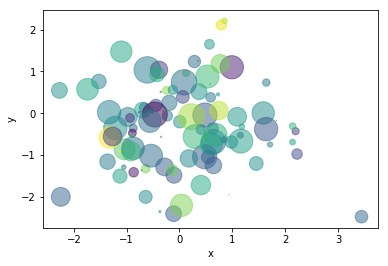

In [49]:
plt.scatter(*np.random.randn(2, 100), 
            s=np.pi * (15 * np.random.rand(100))**2 , 
            c=np.random.randn(100), alpha=0.5,
            cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [51]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_autogen_docstring',
 '_backend_mod',
 '_backend_selection',
 '_hold_msg',
 '_imread',
 '_imsave',
 '_interactive_bk',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 '_string_to_bool',
 'absolute_import',
